In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smsspamcollection/SMSSpamCollection


In [2]:
import subprocess
import sys

In [3]:
#install packages

packages=[
    'transformers',
    'datasets',
    'torch',
    'scikit-learn',
    #'pandas',
    #'numpy',
    'matplotlib',
    'seaborn',
    'tqdm'
]
for package in packages:
    subprocess.check_call([sys.executable, '-m','pip','install','q',package])

print("packages installed")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system ==

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
!pip install transformers

In [5]:
#import libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [6]:
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    get_linear_schedule_with_warmup
)
from torch.optim import AdamW

2025-10-05 09:57:32.846576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759658253.048230      82 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759658253.102182      82 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#set styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(10,6)

In [8]:
# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}\n")

Device: cuda
GPU: Tesla T4



In [9]:
#import data
df=pd.read_csv('/kaggle/input/smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'],encoding='latin-1')

In [10]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#convert labels
df['label']=df['label'].map({'ham':0,'spam':1})

In [12]:
len(df)

5572

In [13]:
print(f"  - Ham: {(df['label']==0).sum()} ({(df['label']==0).mean()*100:.1f}%)")
print(f"  - Spam: {(df['label']==1).sum()} ({(df['label']==1).mean()*100:.1f}%)")

  - Ham: 4825 (86.6%)
  - Spam: 747 (13.4%)


In [14]:
print(f"SPAM: {df[df['label']==1].iloc[0]['message'][:80]}...")
print(f"HAM:  {df[df['label']==0].iloc[0]['message'][:80]}...")


SPAM: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 8...
HAM:  Go until jurong point, crazy.. Available only in bugis n great world la e buffet...


In [15]:
#data preprossesing

#split data 70% train , 15% validation , 15% test
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['message'].values, 
    df['label'].values, 
    test_size=0.3, 
    random_state=42, 
    stratify=df['label']
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, 
    temp_labels, 
    test_size=0.5, 
    random_state=42, 
    stratify=temp_labels
)

In [16]:
print(f"  - Train: {len(train_texts)} samples")
print(f"  - Val:   {len(val_texts)} samples")
print(f"  - Test:  {len(test_texts)} samples")

  - Train: 3900 samples
  - Val:   836 samples
  - Test:  836 samples


In [17]:
# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [18]:
#custom dataset class
class SMSSpamDataset(Dataset):
    """Custom Dataset for SMS messages"""
    
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [19]:
#create datasets

train_dataset = SMSSpamDataset(train_texts, train_labels, tokenizer)
val_dataset = SMSSpamDataset(val_texts, val_labels, tokenizer)
test_dataset = SMSSpamDataset(test_texts, test_labels, tokenizer)

In [20]:
# Create dataloaders
BATCH_SIZE = 16

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

print(f" Dataloaders created (batch_size={BATCH_SIZE})")

 Dataloaders created (batch_size=16)


In [21]:
#model setup

model=DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
model=model.to(device)

In [23]:
print(f" Model loaded: {sum(p.numel() for p in model.parameters()):,} parameters")

 Model loaded: 66,955,010 parameters


In [24]:
# Optimizer and scheduler
LEARNING_RATE = 2e-5
NUM_EPOCHS = 3

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, eps=1e-8)

total_steps = len(train_loader) * NUM_EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

print(f" Optimizer: AdamW (lr={LEARNING_RATE})")
print(f" Scheduler: Linear warmup")
print(f" Training for {NUM_EPOCHS} epochs")

 Optimizer: AdamW (lr=2e-05)
 Scheduler: Linear warmup
 Training for 3 epochs


In [26]:
#training functions

def train_epoch(model, dataloader, optimizer, scheduler, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    predictions = []
    true_labels = []
    
    progress_bar = tqdm(dataloader, desc="Training")
    
    for batch in progress_bar:
        optimizer.zero_grad()
        
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().tolist())
        true_labels.extend(labels.cpu().tolist())
        
        progress_bar.set_postfix({'loss': loss.item()})
    
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    
    return avg_loss, accuracy

def evaluate(model, dataloader, device):
    """Evaluate the model"""
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []
    probabilities = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            loss = outputs.loss
            total_loss += loss.item()
            
            probs = torch.softmax(outputs.logits, dim=1)
            preds = torch.argmax(outputs.logits, dim=1)
            
            predictions.extend(preds.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())
            probabilities.extend(probs[:, 1].cpu().tolist())
    
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    
    return avg_loss, accuracy, predictions, true_labels, probabilities


In [27]:
#training loop


best_val_accuracy = 0
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

for epoch in range(NUM_EPOCHS):
    
    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}")
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device)
    
    # Validate
    val_loss, val_acc, _, _, _ = evaluate(model, val_loader, device)
    
    # Save history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    # Print results
    print(f"\n Results:")
    print(f"   Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"   Val Loss:   {val_loss:.4f}   | Val Acc:   {val_acc:.4f}")
    
    # Save best model
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        torch.save(model.state_dict(), 'best_model.pt')
        print(f"   ✓ Best model saved! (Val Acc: {val_acc:.4f})")

print("\n Training done")
print(f" Best validation accuracy: {best_val_accuracy:.4f}")

Epoch 1/3


Evaluating: 100%|██████████| 53/53 [00:03<00:00, 17.38it/s]



 Results:
   Train Loss: 0.0910 | Train Acc: 0.9721
   Val Loss:   0.0301   | Val Acc:   0.9928
   ✓ Best model saved! (Val Acc: 0.9928)
Epoch 2/3


Evaluating: 100%|██████████| 53/53 [00:03<00:00, 15.63it/s]



 Results:
   Train Loss: 0.0254 | Train Acc: 0.9928
   Val Loss:   0.0320   | Val Acc:   0.9928
Epoch 3/3


Evaluating: 100%|██████████| 53/53 [00:03<00:00, 15.57it/s]


 Results:
   Train Loss: 0.0105 | Train Acc: 0.9982
   Val Loss:   0.0304   | Val Acc:   0.9916

 Training done
 Best validation accuracy: 0.9928


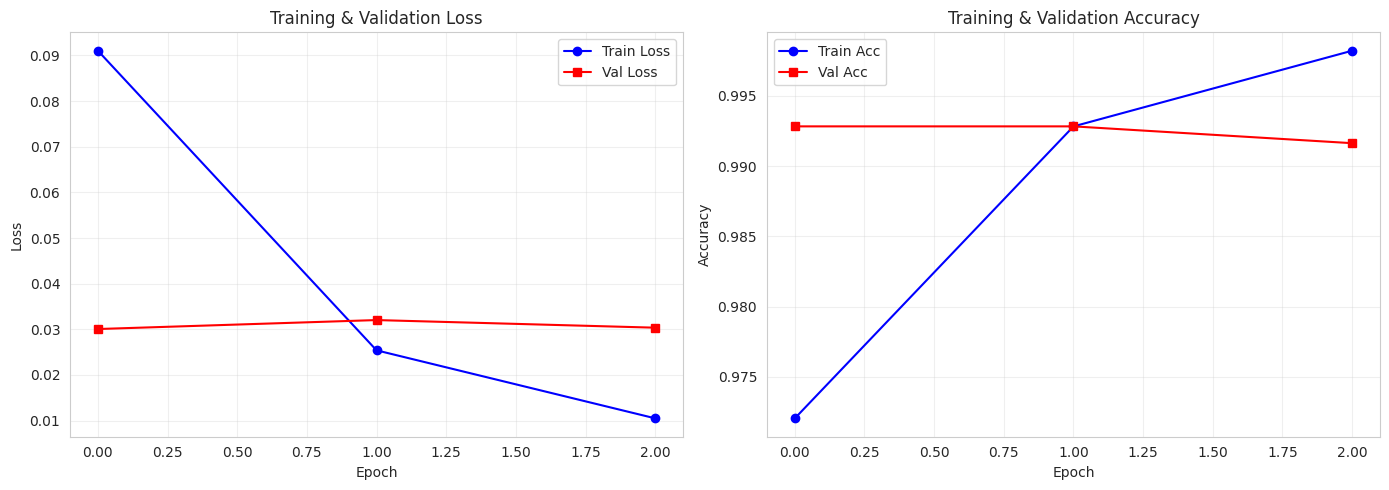

plots saved: training_history.png


In [28]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history['train_loss'], 'b-o', label='Train Loss')
ax1.plot(history['val_loss'], 'r-s', label='Val Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training & Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history['train_acc'], 'b-o', label='Train Acc')
ax2.plot(history['val_acc'], 'r-s', label='Val Acc')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training & Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("plots saved: training_history.png")

In [29]:
#evaluation on test data

# Load best model
model.load_state_dict(torch.load('best_model.pt'))
print(" Best model loaded")

# Evaluate on test set
test_loss, test_acc, predictions, true_labels, probabilities = evaluate(model, test_loader, device)

# Calculate metrics
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels, predictions, average='binary'
)
roc_auc = roc_auc_score(true_labels, probabilities)

print(f"\nTest Set Results:")

print(f"Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

 Best model loaded


Evaluating: 100%|██████████| 53/53 [00:03<00:00, 16.33it/s]


Test Set Results:
Accuracy:  0.9904 (99.04%)
Precision: 0.9643
Recall:    0.9643
F1-Score:  0.9643
ROC-AUC:   0.9990


In [30]:
# Detailed classification report

print("Classification Report:")

print(classification_report(
    true_labels, 
    predictions, 
    target_names=['Ham', 'Spam'],
    digits=4
))

Classification Report:
              precision    recall  f1-score   support

         Ham     0.9945    0.9945    0.9945       724
        Spam     0.9643    0.9643    0.9643       112

    accuracy                         0.9904       836
   macro avg     0.9794    0.9794    0.9794       836
weighted avg     0.9904    0.9904    0.9904       836



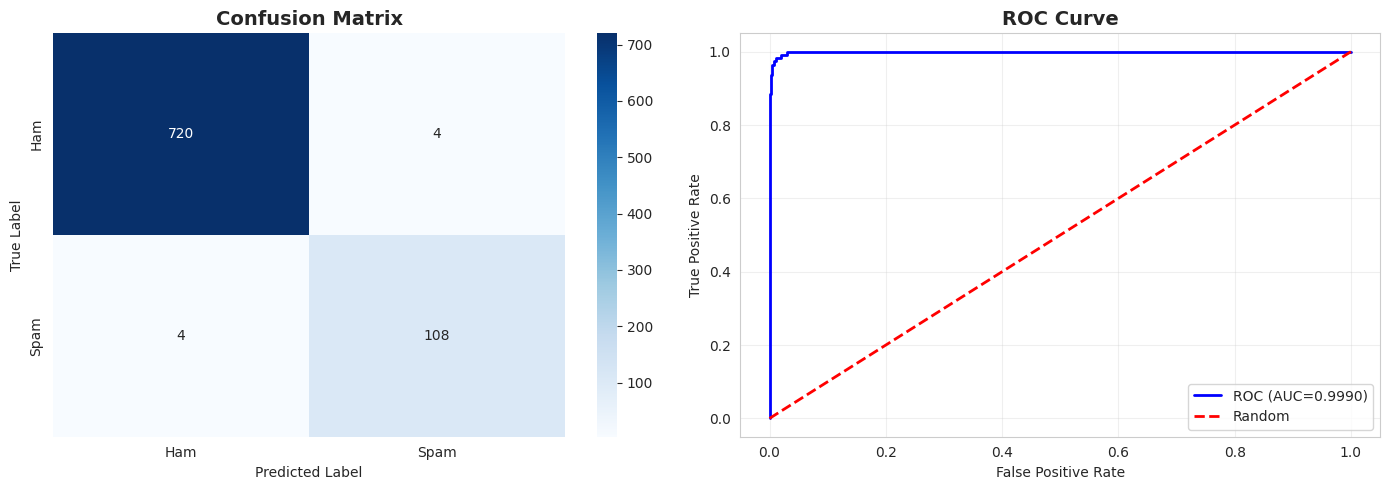


 Evaluation plots saved: evaluation_results.png


In [31]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Ham', 'Spam'],
    yticklabels=['Ham', 'Spam'],
    ax=axes[0]
)
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, probabilities)
axes[1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC (AUC={roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Evaluation plots saved: evaluation_results.png")

In [32]:
#inference

def predict_spam(text, model, tokenizer, device):
    """
    Predict if a text is spam
    
    Args:
        text: Input message
        model: Trained model
        tokenizer: DistilBERT tokenizer
        device: torch device
    
    Returns:
        dict with prediction details
    """
    model.eval()
    
    # Tokenize
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Predict
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)
        prediction = torch.argmax(outputs.logits, dim=1).item()
        confidence = probs[0][prediction].item()
        spam_prob = probs[0][1].item()
    
    return {
        'text': text,
        'prediction': 'SPAM' if prediction == 1 else 'HAM',
        'confidence': confidence,
        'spam_probability': spam_prob,
        'is_spam': prediction == 1
    }

In [33]:
# Test examples
test_messages = [
    "Hey, are we still meeting for lunch tomorrow at 1pm?",
    "URGENT! Your bank account has been compromised. Click here NOW!",
    "Congratulations! You've WON a FREE iPhone. Call 555-1234 to claim!",
    "Can you pick up milk on your way home? Thanks!",
    "Your Amazon order #12345 has been shipped.",
    "LIMITED TIME: Buy 1 Get 1 FREE! Text STOP to unsubscribe.",
    "Happy birthday! Hope you have a wonderful day 🎂",
    "WINNER! You've been selected for a $1000 gift card!",
    "Meeting rescheduled to 3pm. Conference room B.",
    "XXX Hot singles in your area! Click now!"
]


In [34]:
results = []
for i, msg in enumerate(test_messages, 1):
    result = predict_spam(msg, model, tokenizer, device)
    results.append(result)
    
    emoji = "🚨" if result['is_spam'] else "✅"
    print(f"{emoji} {i}. {msg[:60]}{'...' if len(msg) > 60 else ''}")
    print(f"   Prediction: {result['prediction']}")
    print(f"   Confidence: {result['confidence']:.4f} ({result['confidence']*100:.1f}%)")
    print(f"   Spam Prob:  {result['spam_probability']:.4f}\n")

✅ 1. Hey, are we still meeting for lunch tomorrow at 1pm?
   Prediction: HAM
   Confidence: 0.9943 (99.4%)
   Spam Prob:  0.0057

✅ 2. URGENT! Your bank account has been compromised. Click here N...
   Prediction: HAM
   Confidence: 0.7504 (75.0%)
   Spam Prob:  0.2496

🚨 3. Congratulations! You've WON a FREE iPhone. Call 555-1234 to ...
   Prediction: SPAM
   Confidence: 0.9895 (98.9%)
   Spam Prob:  0.9895

✅ 4. Can you pick up milk on your way home? Thanks!
   Prediction: HAM
   Confidence: 0.9922 (99.2%)
   Spam Prob:  0.0078

🚨 5. Your Amazon order #12345 has been shipped.
   Prediction: SPAM
   Confidence: 0.9605 (96.1%)
   Spam Prob:  0.9605

🚨 6. LIMITED TIME: Buy 1 Get 1 FREE! Text STOP to unsubscribe.
   Prediction: SPAM
   Confidence: 0.9507 (95.1%)
   Spam Prob:  0.9507

✅ 7. Happy birthday! Hope you have a wonderful day 🎂
   Prediction: HAM
   Confidence: 0.9880 (98.8%)
   Spam Prob:  0.0120

🚨 8. WINNER! You've been selected for a $1000 gift card!
   Prediction: SPAM
   C

In [36]:
import os

# Define correct save directory
output_dir = "/kaggle/working/sms-spam-detector"
os.makedirs(output_dir, exist_ok=True)

# Save model
model.save_pretrained(output_dir)
print(f"✓ Model saved to {output_dir}/")

# Save tokenizer
tokenizer.save_pretrained(output_dir)
print(f"✓ Tokenizer saved to {output_dir}/")


✓ Model saved to /kaggle/working/sms-spam-detector/
✓ Tokenizer saved to /kaggle/working/sms-spam-detector/


In [37]:
!git config --global user.name "didulanthaisuru"
!git config --global user.email "didulanthapki.22@uom.lk"
